# 任务一
从UCI下载隐形眼镜数据集，使用之前创建的决策树算法将其转化为我们所需要的决策树

## 1、加载数据

In [1]:
# 对于已经下载好的数据集（lenses.txt）,在python中直接加载就行。
fr = open("./data/lenses.txt")

## 2、数据处理

In [2]:
# 先是对原数据进行分割：
lenses = [inst.strip().split("\t") for inst in fr.readlines()]

# 然后输入需分类的标签：
lensesLabels = ["age", "prescript", "astigmatic", "tearRate"]

## 3、训练算法

In [3]:
# 训练数据主要是用到之前在决策树实验讲义上的一些函数，在这里重新整合一下:

from math import log


def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    # 为所有可能分类创建字典
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannoEnt = 0.0

    # 以二为底求对数
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannoEnt -= prob * log(prob, 2)
    return shannoEnt

In [4]:
def splitDataset(dataSet, axis, value):
    retdataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            # 抽取
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis + 1 :])
            retdataSet.append(reducedFeatVec)

    return retdataSet

In [5]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1

    # 创建唯一分类标签
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueValis = set(featList)
        newEntropy = 0.0

        # 计划每种划分的信息墒
        for value in uniqueValis:
            subDataSet = splitDataset(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy

        # 计算最好的增益墒
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [6]:
import operator


def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True
    )
    return sortedClassCount

In [7]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        # 停止分类直至所有类别相等
        return classList[0]
    if len(dataSet[0]) == 1:
        # 停止分割直至没有更多特征
        return majorityCnt(classList)
    bestfaet = chooseBestFeatureToSplit(dataSet)
    bestfaetlabel = labels[bestfaet]
    mytree = {bestfaetlabel: {}}
    del labels[bestfaet]

    # 得到包含所有属性的列表
    featvalues = [example[bestfaet] for example in dataSet]
    uniquevalues = set(featvalues)
    for value in uniquevalues:
        sublables = labels[:]
        mytree[bestfaetlabel][value] = createTree(
            splitDataset(dataSet, bestfaet, value), sublables
        )

    return mytree

## 4、开始训练
至此，模型构造完毕，接下来进行训练。

In [8]:
lensesTree = createTree(lenses, lensesLabels)
print("输出结果如下:\n", lensesTree)

输出结果如下:
 {'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}, 'young': 'soft'}}, 'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}, 'myope': 'hard'}}}}}}


# 任务二
* 所得即是文本方式的决策树。但这样很难分辨出决策树的结构，所以采用Matplotlib将决策树可视化
* 将所得到的决策树可视化，沿着决策树的不同分支，得到不同患者需要佩戴的隐形眼镜类型。


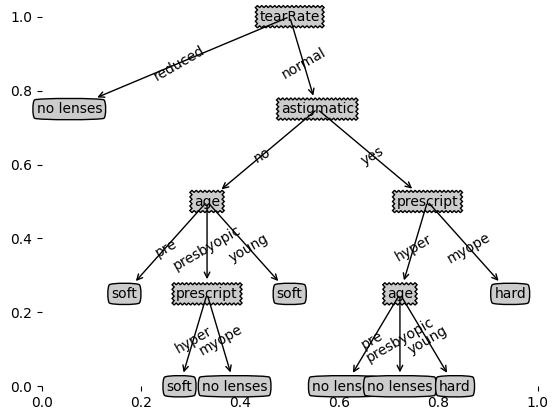

In [9]:
from common.drawTree import createPlot  # 绘制决策树的代码放在了./common/drawTree.py文件中

a = createPlot(lensesTree)